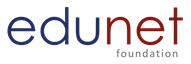

# Edunet Foundation : Class Room Exercises

# Lab 32-NLP Concepts based project : Spam Email Classification using NLP and Machine Learning

In [1]:
import nltk 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
messages = [line.rstrip() for line in open('./SMSSpamCollection')]
print(len(messages))

5574


In [5]:
for message_no, message in enumerate(messages[:10]):
  print(message_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [6]:
import pandas as pd 
messages = pd.read_csv('./SMSSpamCollection', sep='\t', names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# EDA - Text data 

messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages['length'] = messages['message'].apply(len)

In [9]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 


<AxesSubplot:ylabel='Frequency'>

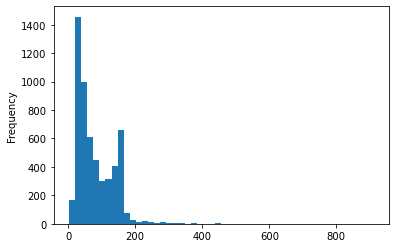

In [11]:
messages['length'].plot(bins = 50, kind='hist')

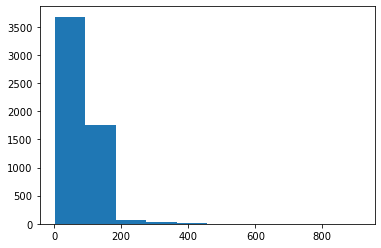

In [12]:
plt.hist(messages['length'])
plt.show()

<AxesSubplot:xlabel='length', ylabel='Count'>

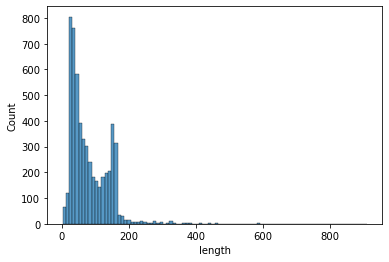

In [13]:
sns.histplot(messages['length'])

In [14]:
import string
msg = 'Hey this is Faculty of CSE!, Im learning AI on cloud platform' 

# NL - TK (word | sentance) 

from nltk.tokenize import word_tokenize

word_tokenize(msg)




['Hey',
 'this',
 'is',
 'Faculty',
 'of',
 'CSE',
 '!',
 ',',
 'Im',
 'learning',
 'AI',
 'on',
 'cloud',
 'platform']

In [15]:
#NLP - Stopwords removing - Text pre-processing 

from nltk.corpus import stopwords 

In [16]:
stopwords.words('english') [:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
nopunc = [char for char in msg if char not in string.punctuation] 
nopunc = ''.join(nopunc)

In [18]:
msg 

'Hey this is Faculty of CSE!, Im learning AI on cloud platform'

In [19]:
nopunc

'Hey this is Faculty of CSE Im learning AI on cloud platform'

In [20]:
from nltk.corpus import stopwords 

cl_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
cl_msg

['Hey', 'Faculty', 'CSE', 'Im', 'learning', 'AI', 'cloud', 'platform']

In [22]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation] 
    nopunc = ''.join(nopunc) 

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [23]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [25]:
### Normalization 
1. stemming 
2. lemmatization

SyntaxError: invalid syntax (1142685462.py, line 2)

In [26]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

In [27]:
msg_stem = """ The crew of the USS Discovery discovered many discoveries.
Discovering is what explorers do."""

In [28]:
words = word_tokenize(msg_stem)

In [29]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [30]:
stemmed_words = [stemmer.stem(word) for word in words]


In [31]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

In [32]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('discoveries')

'discovery'

In [33]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

In [34]:
lemmatized_words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discovery',
 '.',
 'Discovering',
 'is',
 'what',
 'explorer',
 'do',
 '.']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
bow_transformer =  CountVectorizer(analyzer=text_process).fit(messages['message'])

In [37]:
print(len(bow_transformer.vocabulary_))

11425


In [38]:
msg4 = messages['message'][3]

In [39]:
msg4

'U dun say so early hor... U c already then say...'

In [40]:
bow4 = bow_transformer.transform([msg4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [41]:
messages_bow = bow_transformer.transform(messages['message']) 

print('Shape of Sparse Matrix:' , messages_bow.shape) 
print('Amount of Non-zero occurance:', messages_bow.nnz) 
print('Sparsilty value: %.2f%%',(100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix: (5572, 11425)
Amount of Non-zero occurance: 50548
Sparsilty value: %.2f%% 0.07940295412668218


In [42]:
# TF -iDF  
from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_transformer = TfidfTransformer().fit(messages_bow) 
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)


  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [43]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [44]:
messages_tfidf = tfidf_transformer.transform(messages_bow) 

print(messages_tfidf.shape)

(5572, 11425)


In [45]:
from sklearn.naive_bayes import MultinomialNB  
spam_detect_model = MultinomialNB() # model creation 
spam_detect_model.fit(messages_tfidf, messages['label']) # training 

MultinomialNB()

In [46]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])

predicted: ham


In [47]:
print('expected:', messages.label[3])

expected: ham


In [48]:
all_predictions =  spam_detect_model.predict(messages_tfidf) 

print(all_predictions) # model testing 

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [49]:
from sklearn.metrics import classification_report  # model evl.  

print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

